# Today's at the moment stock data analysis

For my project I wanted to look at today's at the moment stock data and find out the top 5 largest stock by volume at the particular time and using yfinance get the information about those stocks and thru data visualization see how that stock is performing for the past year. I wanted to see when was the highest high, lowest low, when was the closing price of the data high n low as well as the opening price of the data. 


I am using yfinance which is built in on yahoo finance API for my analysis and for my visualisation I am using plotly as I am plotting interactive data.

In [59]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as px


# to print current time and a day of the week and formatted
date = pd.Timestamp(datetime.datetime.today())
today = f"{date.day_name()} {date.strftime('%m-%d-%y %H:%M:%S')} "
today
#print(f"Today is {today.day_name()} {today.strftime('%m-%d-%y %H:%M:%S')} ")



'Sunday 03-26-23 00:00:12 '

In [60]:
def convert_scale(x):
    if type(x) == float or type(x) == int:
        return x
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000.0
    elif 'B' in x:
        if len(x) > 1:
            return float(x.replace('B', '')) * 1000000000
        return 1000000.0
    elif 'T' in x:
        return float(x.replace('T', '')) * 1000000000000
    else:
        return float(x)

## Feature 1: Loading Data
As per the requirement, 2 data sets to be loaded in. I decided to use pandas, read_html function which reads HTML tables into a list of DataFrame objects. I am reading in the tables from https://finance.yahoo.com/. From there, I am webscraping most-active, gainers and losers tables. 
The default filters used on the links.
1. most-active
    Region: United States, Market Cap (Intraday): Mid Cap and Large Cap and Mega Cap, Volume:greater than 5000000
2. gainers
    % Change in Price (Intraday):greater than 3, Region: United States, Market Cap (Intraday): Mid Cap and Large Cap and Mega Cap, Volume:greater than 15000
3. losers
    % Change in Price (Intraday):less than -2.5, Region: United States, Market Cap (Intraday): Mid Cap and Large Cap and Mega Cap, Volume:greater than 20000

We imported the Pandas module.
Using the read_html() method and passing the URL, we’ll get all the HTML tables from the website. Keep in mind the read_html() method returns a list.
Since we got a list holding the tables, we need to access the first element on the list, then we can pass the data as argument to the Pandas Dataframe() method to create our data set.

In [61]:
# reading in from a website and getting only the 1st page
most_active = pd.read_html('https://finance.yahoo.com/most-active')[0]
print(most_active.shape) #shows the shape of table
most_active.head() #print first 5 rows


(25, 10)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,TSLA,"Tesla, Inc.",190.4100,-1.8100,-0.94%,116.532M,180.633M,602.476B,50.51,NaN
1,BAC,Bank of America Corporation,27.1400,0.1700,+0.63%,96.333M,53.081M,217.1B,8.45,NaN
2,FRC,First Republic Bank,12.3600,-0.1700,-1.36%,72.124M,25.343M,2.302B,1.48,NaN
3,F,Ford Motor Company,11.5100,0.0900,+0.79%,71.418M,68.951M,45.881B,NaN,NaN
4,CS,Credit Suisse Group AG,0.8612,-0.0107,-1.23%,62.982M,46.328M,3.394B,NaN,NaN


In [62]:
# reading in 2nd table
gainers = pd.read_html('https://finance.yahoo.com/gainers')[0]
print(gainers.shape)
gainers.head()


(25, 10)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,RNW,ReNew Energy Global Plc,5.36,0.97,+22.10%,3.928M,1.055M,2.077B,NaN,NaN
1,PROK,ProKidney Corp.,12.62,1.67,+15.25%,432713,201780,2.937B,NaN,NaN
2,HSAI,Hesai Group,16.23,2.13,+15.11%,328974,668370,2.037B,NaN,NaN
3,BBIO,"BridgeBio Pharma, Inc.",14.90,1.32,+9.72%,9.502M,2.849M,2.387B,NaN,NaN
4,BAK,Braskem S.A.,6.82,0.53,+8.43%,1.445M,671860,2.865B,7.66,NaN


In [63]:
# reading in 3rd table
losers = pd.read_html('https://finance.yahoo.com/losers')[0]
print(losers.shape)
losers.head()


(25, 10)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,GTLB,GitLab Inc.,33.74,-3.1900,-8.64%,4.381M,2.663M,5.1B,NaN,NaN
1,EGFEY,Eurobank Ergasias Services and Holdings S.A.,0.64,-0.0589,-8.43%,25725,43229,4.784B,3.76,NaN
2,NEO,"NeoGenomics, Inc.",16.87,-1.2900,-7.10%,1.56M,1.063M,2.15B,NaN,NaN
3,LKNCY,Luckin Coffee Inc.,23.73,-1.7500,-6.87%,5.46M,1.734M,6.291B,118.65,NaN
4,ARRY,"Array Technologies, Inc.",18.47,-1.3400,-6.76%,6.153M,4.985M,2.785B,NaN,NaN


## Feature 2: Clean and operate on the data while combining them.


The concat() function was used to combine multiple datasets to create a new one. Concat
function stacks the dataset on top of each other. Then analysis can be performed on the new
combined dataset. To have a continuous index the 'ignore_index=True' parameter was used. A
custom function that converts 'M', 'B', and 'T' into corresponding 10^n values was used. The
fillna() function was used to replace Nan values with 0. The drop() function was used to delete a
column.

In [64]:
# joining 3 datasets into 1 dataframe.
stocks_df = pd.concat([most_active, gainers, losers],  ignore_index=True)
print(stocks_df.shape) # shows shape of new dataframe
print(f'Datatype before the change \n ')
stocks_df.info() 
stocks_df.head() # prints top 5 rows



(75, 10)
Datatype before the change 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             75 non-null     object 
 1   Name               75 non-null     object 
 2   Price (Intraday)   75 non-null     float64
 3   Change             75 non-null     float64
 4   % Change           75 non-null     object 
 5   Volume             75 non-null     object 
 6   Avg Vol (3 month)  74 non-null     object 
 7   Market Cap         75 non-null     object 
 8   PE Ratio (TTM)     47 non-null     float64
 9   52 Week Range      0 non-null      float64
dtypes: float64(4), object(6)
memory usage: 6.0+ KB


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,TSLA,"Tesla, Inc.",190.4100,-1.8100,-0.94%,116.532M,180.633M,602.476B,50.51,NaN
1,BAC,Bank of America Corporation,27.1400,0.1700,+0.63%,96.333M,53.081M,217.1B,8.45,NaN
2,FRC,First Republic Bank,12.3600,-0.1700,-1.36%,72.124M,25.343M,2.302B,1.48,NaN
3,F,Ford Motor Company,11.5100,0.0900,+0.79%,71.418M,68.951M,45.881B,NaN,NaN
4,CS,Credit Suisse Group AG,0.8612,-0.0107,-1.23%,62.982M,46.328M,3.394B,NaN,NaN


The dropna() function was used to remove the '52 Week Range' column, which consists of NaN
values. Replaced NaN values with 0's using the fillna() function in the 'PE Ratio (TTM)' column.
The apply(convert_scale) function was used to convert the scale, change the datatypes from
object to float64 for 'Volume', 'Avg Vol (3 month)', 'Market Cap' columns. Lastly, the % was
changed to ' ' with a regex=True param. The dataype for '% Change' column was changed using
pandas to_numeric function.

In [65]:
# fill in 0 for NaN values 
stocks_df[['PE Ratio (TTM)', 'Avg Vol (3 month)']] = stocks_df[['PE Ratio (TTM)', 'Avg Vol (3 month)']].fillna(0) # fill in 0 where NaN
stocks_df.dropna(axis=1, thresh=9, inplace=True) # drop a column

#using .apply function to convert the scale n datatypes
stocks_df['Volume'] = stocks_df['Volume'].apply(convert_scale) 
stocks_df['Avg Vol (3 month)'] = stocks_df['Avg Vol (3 month)'].apply(convert_scale)
stocks_df['Market Cap'] = stocks_df['Market Cap'].apply(convert_scale)

# replacing %:'' and changing the dtype of column
stocks_df['% Change'] = pd.to_numeric(stocks_df['% Change'].replace({'%' : ''}, regex=True))
stocks_df.sort_values('Symbol', inplace=True) # sorting the rows in alphabetical order.

print(stocks_df.shape)
print(f'Datatypes after the change: \n') 
stocks_df.info() # shows all the columns, non null count and dtypes
stocks_df.head()

(75, 9)
Datatypes after the change: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 6 to 70
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             75 non-null     object 
 1   Name               75 non-null     object 
 2   Price (Intraday)   75 non-null     float64
 3   Change             75 non-null     float64
 4   % Change           75 non-null     float64
 5   Volume             75 non-null     float64
 6   Avg Vol (3 month)  75 non-null     float64
 7   Market Cap         75 non-null     float64
 8   PE Ratio (TTM)     75 non-null     float64
dtypes: float64(7), object(2)
memory usage: 5.9+ KB


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
6,AAPL,Apple Inc.,160.25,1.32,0.83,59256000.0,70659000.0,2.535000e+12,26.93
5,AMD,"Advanced Micro Devices, Inc.",97.95,-2.33,-2.32,64691000.0,61474000.0,1.578360e+11,115.24
7,AMZN,"Amazon.com, Inc.",98.13,-0.58,-0.59,56145000.0,69249000.0,1.012000e+12,0.00
54,ARRY,"Array Technologies, Inc.",18.47,-1.34,-6.76,6153000.0,4985000.0,2.785000e+09,0.00
69,ATLKY,Atlas Copco AB,11.53,-0.61,-5.02,190369.0,275304.0,5.613200e+10,26.20


The pandas concat() function stacks data sets on top of each other. Collecting most_active,
gainers and losers stocks, most_active stocks could be a gainer or a loser for any given day.
Thus, the duplicated() function was used to check for any duplicate rows then drop_duplicates deletes the duplicated row/s.

In [66]:
# find if there are any duplicated rows referencing column Symbol

duplicate = stocks_df[stocks_df.duplicated('Symbol')]
duplicate

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
42,KEY,KeyCorp,11.86,0.59,5.24,28459000.0,19250000.0,1.096900e+10,5.87


In [67]:
# if there is any duplicates drop_duplicates function will delete the rows, 
# keep='last' param keeps the last occurence and drops anything else. 
# inplace= True would replace the original df 
stocks_df.drop_duplicates(subset=['Symbol'], keep='last', inplace=True, ignore_index=True) 
print(stocks_df.shape) # prints updated shape of df

pd.set_option('display.max_rows', None) # displays all the rows
stocks_df # dispalys all the rows in a df


(74, 9)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,AAPL,Apple Inc.,160.2500,1.3200,0.83,59256000.0,70659000.0,2.535000e+12,26.93
1,AMD,"Advanced Micro Devices, Inc.",97.9500,-2.3300,-2.32,64691000.0,61474000.0,1.578360e+11,115.24
2,AMZN,"Amazon.com, Inc.",98.1300,-0.5800,-0.59,56145000.0,69249000.0,1.012000e+12,0.00
3,ARRY,"Array Technologies, Inc.",18.4700,-1.3400,-6.76,6153000.0,4985000.0,2.785000e+09,0.00
4,ATLKY,Atlas Copco AB,11.5300,-0.6100,-5.02,190369.0,275304.0,5.613200e+10,26.20
5,ATVI,"Activision Blizzard, Inc.",84.3900,4.7100,5.91,24501000.0,6345000.0,6.618500e+10,41.57
6,BAC,Bank of America Corporation,27.1400,0.1700,0.63,96333000.0,53081000.0,2.171000e+11,8.45
7,BAK,Braskem S.A.,6.8200,0.5300,8.43,1445000.0,671860.0,2.865000e+09,7.66
8,BBD,Banco Bradesco S.A.,2.4100,0.0300,1.26,35934000.0,36395000.0,2.564800e+10,6.69
9,BBIO,"BridgeBio Pharma, Inc.",14.9000,1.3200,9.72,9502000.0,2849000.0,2.387000e+09,0.00


Data Analysis:



       Price (Intraday)     Change   % Change        Volume  \
count         74.000000  74.000000  74.000000  7.400000e+01   
mean          55.408524  -0.113620   0.432432  1.857050e+07   
std           84.421695   4.191369   6.049330  2.560397e+07   
min            0.640000 -25.100000  -8.640000  2.162700e+04   
25%           11.515000  -1.057500  -5.050000  6.164542e+05   
50%           22.640000  -0.005350  -0.075000  4.672500e+06   
75%           58.315000   1.235000   5.100000  2.988925e+07   
max          485.400000  13.120000  22.100000  1.165320e+08   

       Avg Vol (3 month)    Market Cap  PE Ratio (TTM)  
count       7.400000e+01  7.400000e+01       74.000000  
mean        1.620667e+07  1.423985e+11       14.417162  
std         2.758348e+07  4.286260e+11       25.252468  
min         0.000000e+00  2.007000e+09        0.000000  
25%         6.692425e+05  2.950750e+09        0.000000  
50%         3.412500e+06  7.269500e+09        5.270000  
75%         2.302375e+07  4.50897

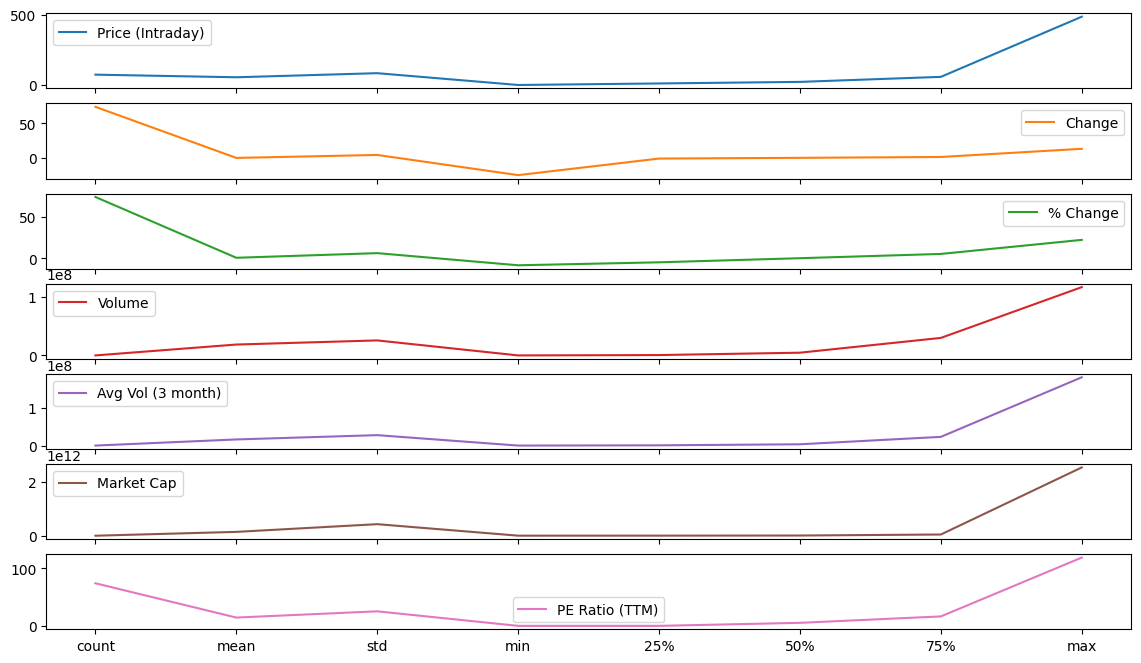

In [68]:

stocks_df.describe().plot(subplots=True, figsize=(14,8))
print(stocks_df.describe())

At the time of this data analysis, bank stocks are the most active and volatile. Some banks use
'Banc, while others use 'Bank', therefore 'Ban' was used as the search term.

In [69]:
# find all rows that have 'Ban' in its name column?
stocks_df.loc[stocks_df.Name.str.contains('(?i)Ban', regex=True)]

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
6,BAC,Bank of America Corporation,27.14,0.1700,0.63,96333000.0,53081000.0,2.171000e+11,8.45
8,BBD,Banco Bradesco S.A.,2.41,0.0300,1.26,35934000.0,36395000.0,2.564800e+10,6.69
18,DB,Deutsche Bank Aktiengesellschaft,9.35,-0.3000,-3.11,36731000.0,5055000.0,2.068000e+10,3.88
20,EBKDY,Erste Group Bank AG,15.23,-0.8900,-5.50,24166.0,44552.0,1.243700e+10,5.62
21,EGFEY,Eurobank Ergasias Services and Holdings S.A.,0.64,-0.0589,-8.43,25725.0,43229.0,4.784000e+09,3.76
24,FRC,First Republic Bank,12.36,-0.1700,-1.36,72124000.0,25343000.0,2.302000e+09,1.48
32,INDB,Independent Bank Corp.,67.90,3.1700,4.90,439956.0,269904.0,3.060000e+09,11.47
36,ITUB,Itaú Unibanco Holding S.A.,4.37,0.0901,2.11,28187000.0,32538000.0,4.271600e+10,7.53
56,PPERY,PT Bank Mandiri (Persero) Tbk,14.04,0.7300,5.45,38853.0,95372.0,3.364200e+10,12.00
71,WAL,Western Alliance Bancorporation,33.05,1.8000,5.76,10422000.0,5760000.0,3.623000e+09,3.01


Get all the rows where volume is at least 20 million and the daily change is at least -5?

In [70]:
volume_change = stocks_df.query('Volume >= 20000000 and Change <= -5')[['Name', 'Change', 'Volume']]
volume_change

,Name,Change,Volume


Find stocks that dropped below 25% and print its symbol, name and % Change ?

In [71]:
stocks_below_25 = stocks_df.query('`% Change` < -25')[['Symbol', 'Name', '% Change']]
stocks_below_25

,Symbol,Name,% Change


Any stocks that performed over 10% today and how many times they transacted today?

In [72]:
stocks_above_20 = stocks_df.query('`% Change` > 10')[['Symbol', 'Name', '% Change', 'Volume']]
stocks_above_20

,Symbol,Name,% Change,Volume
30,HSAI,Hesai Group,15.11,328974.0
57,PROK,ProKidney Corp.,15.25,432713.0
61,RNW,ReNew Energy Global Plc,22.10,3928000.0


In [73]:

Symbol_s = stocks_df.loc[(stocks_df['PE Ratio (TTM)']>=5) & (stocks_df['Change']<= 5) & (stocks_df['Symbol'].str.startswith('S')),['Symbol', 'Name']]
Symbol_s

,Symbol,Name
63,SCHW,The Charles Schwab Corporation
64,SMPL,The Simply Good Foods Company


Is there any company that has Market Cap of 100 Billion or more? print only name and market cap.

In order to filter a DataFrame column that has spaces with the query method, we wrap the column using backticks. While this may not look great, it does allow us to use any column in the method.


In [74]:
large_market_cap = stocks_df.query("`Market Cap` > 100000000000")[['Name', 'Market Cap']]
#print(large_market_cap)

fig = px.bar(large_market_cap, x='Name', y='Market Cap', title='Largest Companies by Market Cap')
fig.show()


## Feature 3: Visualize/Present your data.

In order to find the top five companies by 3 month Average Volume for a particular day, and see how those
stocks are performing for the past year, yfinance library was used. yfinance is a package
designed to download historical stock data from Yahoo Finance. Data is visualized using the
plotly library.

In [75]:
top_5_company = stocks_df.nlargest(5,['Avg Vol (3 month)'])
top_5_company

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
68,TSLA,"Tesla, Inc.",190.41,-1.81,-0.94,116532000.0,180633000.0,6.024760e+11,50.51
0,AAPL,Apple Inc.,160.25,1.32,0.83,59256000.0,70659000.0,2.535000e+12,26.93
2,AMZN,"Amazon.com, Inc.",98.13,-0.58,-0.59,56145000.0,69249000.0,1.012000e+12,0.00
22,F,Ford Motor Company,11.51,0.09,0.79,71418000.0,68951000.0,4.588100e+10,0.00
1,AMD,"Advanced Micro Devices, Inc.",97.95,-2.33,-2.32,64691000.0,61474000.0,1.578360e+11,115.24


In [76]:
# taking a column and chaging it to a list
top_5_volume = (top_5_company.Symbol).to_list()
top_5_volume

['TSLA', 'AAPL', 'AMZN', 'F', 'AMD']

With the yfinance's download method, multiple ticker symbols can be downloaded at the same
time. Each time the list is generated it is passed as the file to run. Since this project is not rigid
and the data changes according to stock market performance. Data is downloaded for a one
year period, with a period of one day intervals, as the stock market is open, timezones are
ignored. To remove the 'Adjust Close Price' column, use auto_adjust=True. Dividends and splits
of stock can be downloaded by setting actions ='inline'. Which this project does not include.

In [77]:
# downloads the stock data for the list of tickers for 1y period
ticker = yf.download(top_5_volume, period='1y',interval='1d', ignore_tz=True, progress=False, auto_adjust=True )
ticker.info() # displays information about the columns
pd.set_option('display.max_columns', None) # displays all the columns with a scroll bar
ticker.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-25 to 2023-03-24
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   251 non-null    float64
 1   (Close, AMD)    251 non-null    float64
 2   (Close, AMZN)   251 non-null    float64
 3   (Close, F)      251 non-null    float64
 4   (Close, TSLA)   251 non-null    float64
 5   (High, AAPL)    251 non-null    float64
 6   (High, AMD)     251 non-null    float64
 7   (High, AMZN)    251 non-null    float64
 8   (High, F)       251 non-null    float64
 9   (High, TSLA)    251 non-null    float64
 10  (Low, AAPL)     251 non-null    float64
 11  (Low, AMD)      251 non-null    float64
 12  (Low, AMZN)     251 non-null    float64
 13  (Low, F)        251 non-null    float64
 14  (Low, TSLA)     251 non-null    float64
 15  (Open, AAPL)    251 non-null    float64
 16  (Open, AMD)     251 non-null    float64
 17  (Open, AMZN)    

Close                                                 \
                  AAPL         AMD        AMZN          F        TSLA   
Date                                                                    
2022-03-25  173.667984  119.669998  164.773499  15.081247  336.880005   
2022-03-28  174.542679  120.239998  168.990494  15.264385  363.946655   
2022-03-29  177.882446  123.230003  169.315002  16.253319  366.523346   
2022-03-30  176.699615  119.220001  166.300995  15.813792  364.663330   
2022-03-31  173.558640  109.339996  162.997498  15.484147  359.200012   

                  High                                                 \
                  AAPL         AMD        AMZN          F        TSLA   
Date                                                                    
2022-03-25  174.224610  121.400002  165.368500  15.365109  340.600006   
2022-03-28  174.671886  120.410004  169.037506  15.273542  365.959991   
2022-03-29  177.932133  123.709999  170.831497  16.299102  371.589996   
2022-03-30  178.528533  125.669998  168.950500  16.170907  371.316681   
2022-03-31  176.958045  116.379997  166.494995  15.887047  367.713318   

                   Low                                                 \
                  AAPL         AMD        AMZN          F        TSLA   
Date                                                                    
2022-03-25  171.709844  117.250000  162.250000  14.962210  332.440002   
2022-03-28  170.964349  116.709999  164.899994  14.907271  351.200012   
2022-03-29  175.278212  119.589996  167.868500  15.575716  357.703339   
2022-03-30  175.636051  118.589996  165.500000  15.749695  361.333344   
2022-03-31  173.349897  109.019997  162.953506  15.108718  358.880005   

                  Open                                                 \
                  AAPL         AMD        AMZN          F        TSLA   
Date                                                                    
2022-03-25  172.833045  119.919998  164.000000  15.328481  336.000000   
2022-03-28  171.133324  117.699997  164.975006  15.154503  355.033325   
2022-03-29  175.626110  122.279999  170.384003  15.575716  369.329987   
2022-03-30  177.474918  123.040001  168.509506  16.042712  363.723328   
2022-03-31  176.769187  116.309998  166.445007  15.749695  364.856659   

               Volume                                            
                 AAPL        AMD      AMZN         F       TSLA  
Date                                                             
2022-03-25   80546200   95852400  49032000  62023100   62031600  
2022-03-28   90371900   92966100  59854000  54634400  102506100  
2022-03-29  100589400   94143000  66154000  90676900   73614900  
2022-03-30   92633200   99476900  56168000  57853400   59865000  
2022-03-31  103049300  147004800  59966000  52529400   48992700

## Plotting Data


In [99]:
close = ticker.Close
#print(close)
max = close.max()
print(f'The highest closing price for these companies are: \n{max}\n')
min = close.min()
print(f'The lowest closing price for these companies are: \n{min}')

fig = px.line(close, title=f"Closing Price for stocks with largest volume on {today} for past 1y") 
fig.show()

The highest closing price for these companies are: 
AAPL    177.882446
AMD     123.230003
AMZN    169.315002
F        16.253319
TSLA    381.816681
dtype: float64

The lowest closing price for these companies are: 
AAPL    124.829399
AMD      55.939999
AMZN     81.820000
F        10.194802
TSLA    108.099998
dtype: float64


In [100]:
high = ticker.High
max = high.max()
print(f'The highest high price for these companies are: \n{max}\n')
min = high.min()
print(f'The lowest high price for these companies are: \n{min}')

figure = px.bar(high, title=f" High's for stocks with largest volume on {today} for past 1y")
figure.show()

The highest high price for these companies are: 
AAPL    178.528533
AMD     125.669998
AMZN    170.831497
F        16.299102
TSLA    384.290009
dtype: float64

The lowest high price for these companies are: 
AAPL    127.575207
AMD      58.320000
AMZN     83.480003
F        10.333068
TSLA    111.750000
dtype: float64


In [101]:
low = ticker.Low
max = low.max()
print(f'The highest low price for these companies are: \n{max}\n')
min = low.min()
print(f'The lowest low price for these companies are: \n{min}')
figure = px.line(ticker.Low, title=f"Low's for stocks with largest volume on {today} for past 1y", markers=True)
figure.show()

The highest low price for these companies are: 
AAPL    175.636051
AMD     119.589996
AMZN    167.868500
F        15.749695
TSLA    362.433319
dtype: float64

The lowest low price for these companies are: 
AAPL    123.980696
AMD      54.570000
AMZN     81.430000
F         9.780004
TSLA    101.809998
dtype: float64


In [102]:
open = ticker.Open
max = open.max()
print(f'The highest opening price for these companies are: \n{max}\n')
min = open.min()
print(f'The lowest opening price for these companies are: \n{min}')
px.area(open, title=f"Opening price for stocks with largest volume on {today} for past 1y")

The highest opening price for these companies are: 
AAPL    177.474918
AMD     123.040001
AMZN    170.384003
F        16.042712
TSLA    378.766663
dtype: float64

The lowest opening price for these companies are: 
AAPL    125.817904
AMD      55.520000
AMZN     82.800003
F        10.185584
TSLA    103.000000
dtype: float64


In [104]:
volume = ticker.Volume
volume
max = volume.max()
print(f'The highest volume for these companies are: \n{max}\n')
min = volume.min()
print(f'The lowest volume for these companies are: \n{min}')
fig = px.scatter(volume, title=f"Volume for stock with largest volume on {today} for past 1y") 
fig.show()
#volume.plot(subplots=True, figsize=(10,18))


The highest volume for these companies are: 
AAPL    182602000
AMD     225394100
AMZN    272662000
F       249784100
TSLA    306590600
dtype: int64

The lowest volume for these companies are: 
AAPL    35195900
AMD     26018900
AMZN    35088600
F       12980900
TSLA    41864700
dtype: int64


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

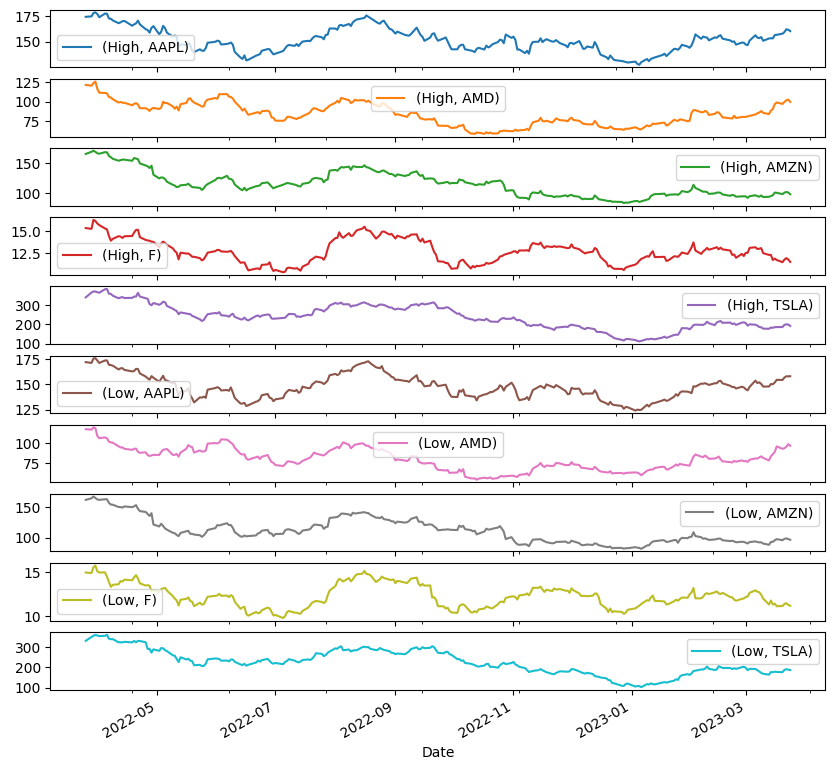

In [83]:
High_Low = ticker.loc[:, ['High', 'Low' ]]
High_Low.head()
High_Low.max()
High_Low.plot(subplots=True, figsize=(10,10))
#ax = High_Low.unstack(level=0).plot(figsize=(14,6))


## Feature 4: Best Practices.
Unit tests